In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = './datasets/'
csv = '.csv'
count_vect_df = pd.read_csv(dataset + 'count_vect_df' + csv)
title_sub_df = pd.read_csv(dataset + 'title_sub_df' + csv)
fullset_feature_importance_df = pd.read_csv(dataset + 'fullset_feature_importance_df' + csv)
feature_importance_df = pd.read_csv(dataset + 'feature_importance_df' + csv)

In [16]:
count_vect_df.head()

,title,subreddit,sentiment,char_count,word_count,able,abroad,absolved,abuse,accept,...,wth,ww,xbox,year,yesterday,york,young,younger,youre,youve
0,people who had found close and good relationsh...,0,0.4404,4.325154,3.480600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,whats been your worst experience in a video game,0,-0.6249,-0.567269,-0.595601,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whats a piece of reddit history everyone shoul...,0,0.0000,-0.335401,-0.472080,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,what are some cultural difference youve notice...,0,0.0000,-0.242653,-0.595601,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,whats been your worst experience in a video game,0,-0.6249,-0.567269,-0.595601,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
title_sub_df.head()

,title,subreddit,sentiment,char_count,word_count
0,people who had found close and good relationsh...,AskReddit,0.4404,259,42
1,whats been your worst experience in a video game,AskReddit,-0.6249,48,9
2,whats a piece of reddit history everyone shoul...,AskReddit,0.0000,58,10
3,what are some cultural difference youve notice...,AskReddit,0.0000,62,9
4,whats been your worst experience in a video game,AskReddit,-0.6249,48,9


In [13]:
fullset_feature_importance_df.head()

,importance,word,word_counts
0,1.816424,sentiment,-1.656678e+03
1,-1.114370,char_count,0.000000e+00
2,-1.184595,word_count,3.183231e-12
3,-0.687281,able,2.000000e+02
4,-0.365244,abroad,1.000000e+02


In [15]:
feature_importance_df.head()

,importance,word,word_counts
0,0.700891,sentiment,-862.635000
1,-0.538200,char_count,15.755457
2,-1.343942,word_count,17.663536
3,-0.637068,able,105.000000
4,-0.428743,abroad,54.000000


In [35]:
bad_word_df = title_sub_df[title_sub_df['subreddit'].str.contains('AmItheAsshole')]
better_word_df = title_sub_df[~title_sub_df['subreddit'].str.contains('AmItheAsshole')]

In [37]:
better_word_df = title_sub_df[~title_sub_df['subreddit'].str.contains('AmItheAsshole')]

### Graphing

#### Creating comparitive graphs between the two datasets so that the more relavent features that are non word related can be better comprehended by humans

In [1]:
plt.figure(figsize = [12, 10], dpi = 300)
plt.hist(better_word_df['word_count'], alpha = .5, label = 'AskReddit & ExplainLikeIm5')
plt.hist(bad_word_df['word_count'], alpha = .5, label = 'AmItheAsshole', color = 'r');
plt.legend(loc = 'upper right')
plt.title('Word Count Frequency for Reddit posts');
plt.ylabel('Total Posts');
plt.xlabel('Word Count');

NameError: name 'plt' is not defined

Text(0.5, 0, 'Character Count')

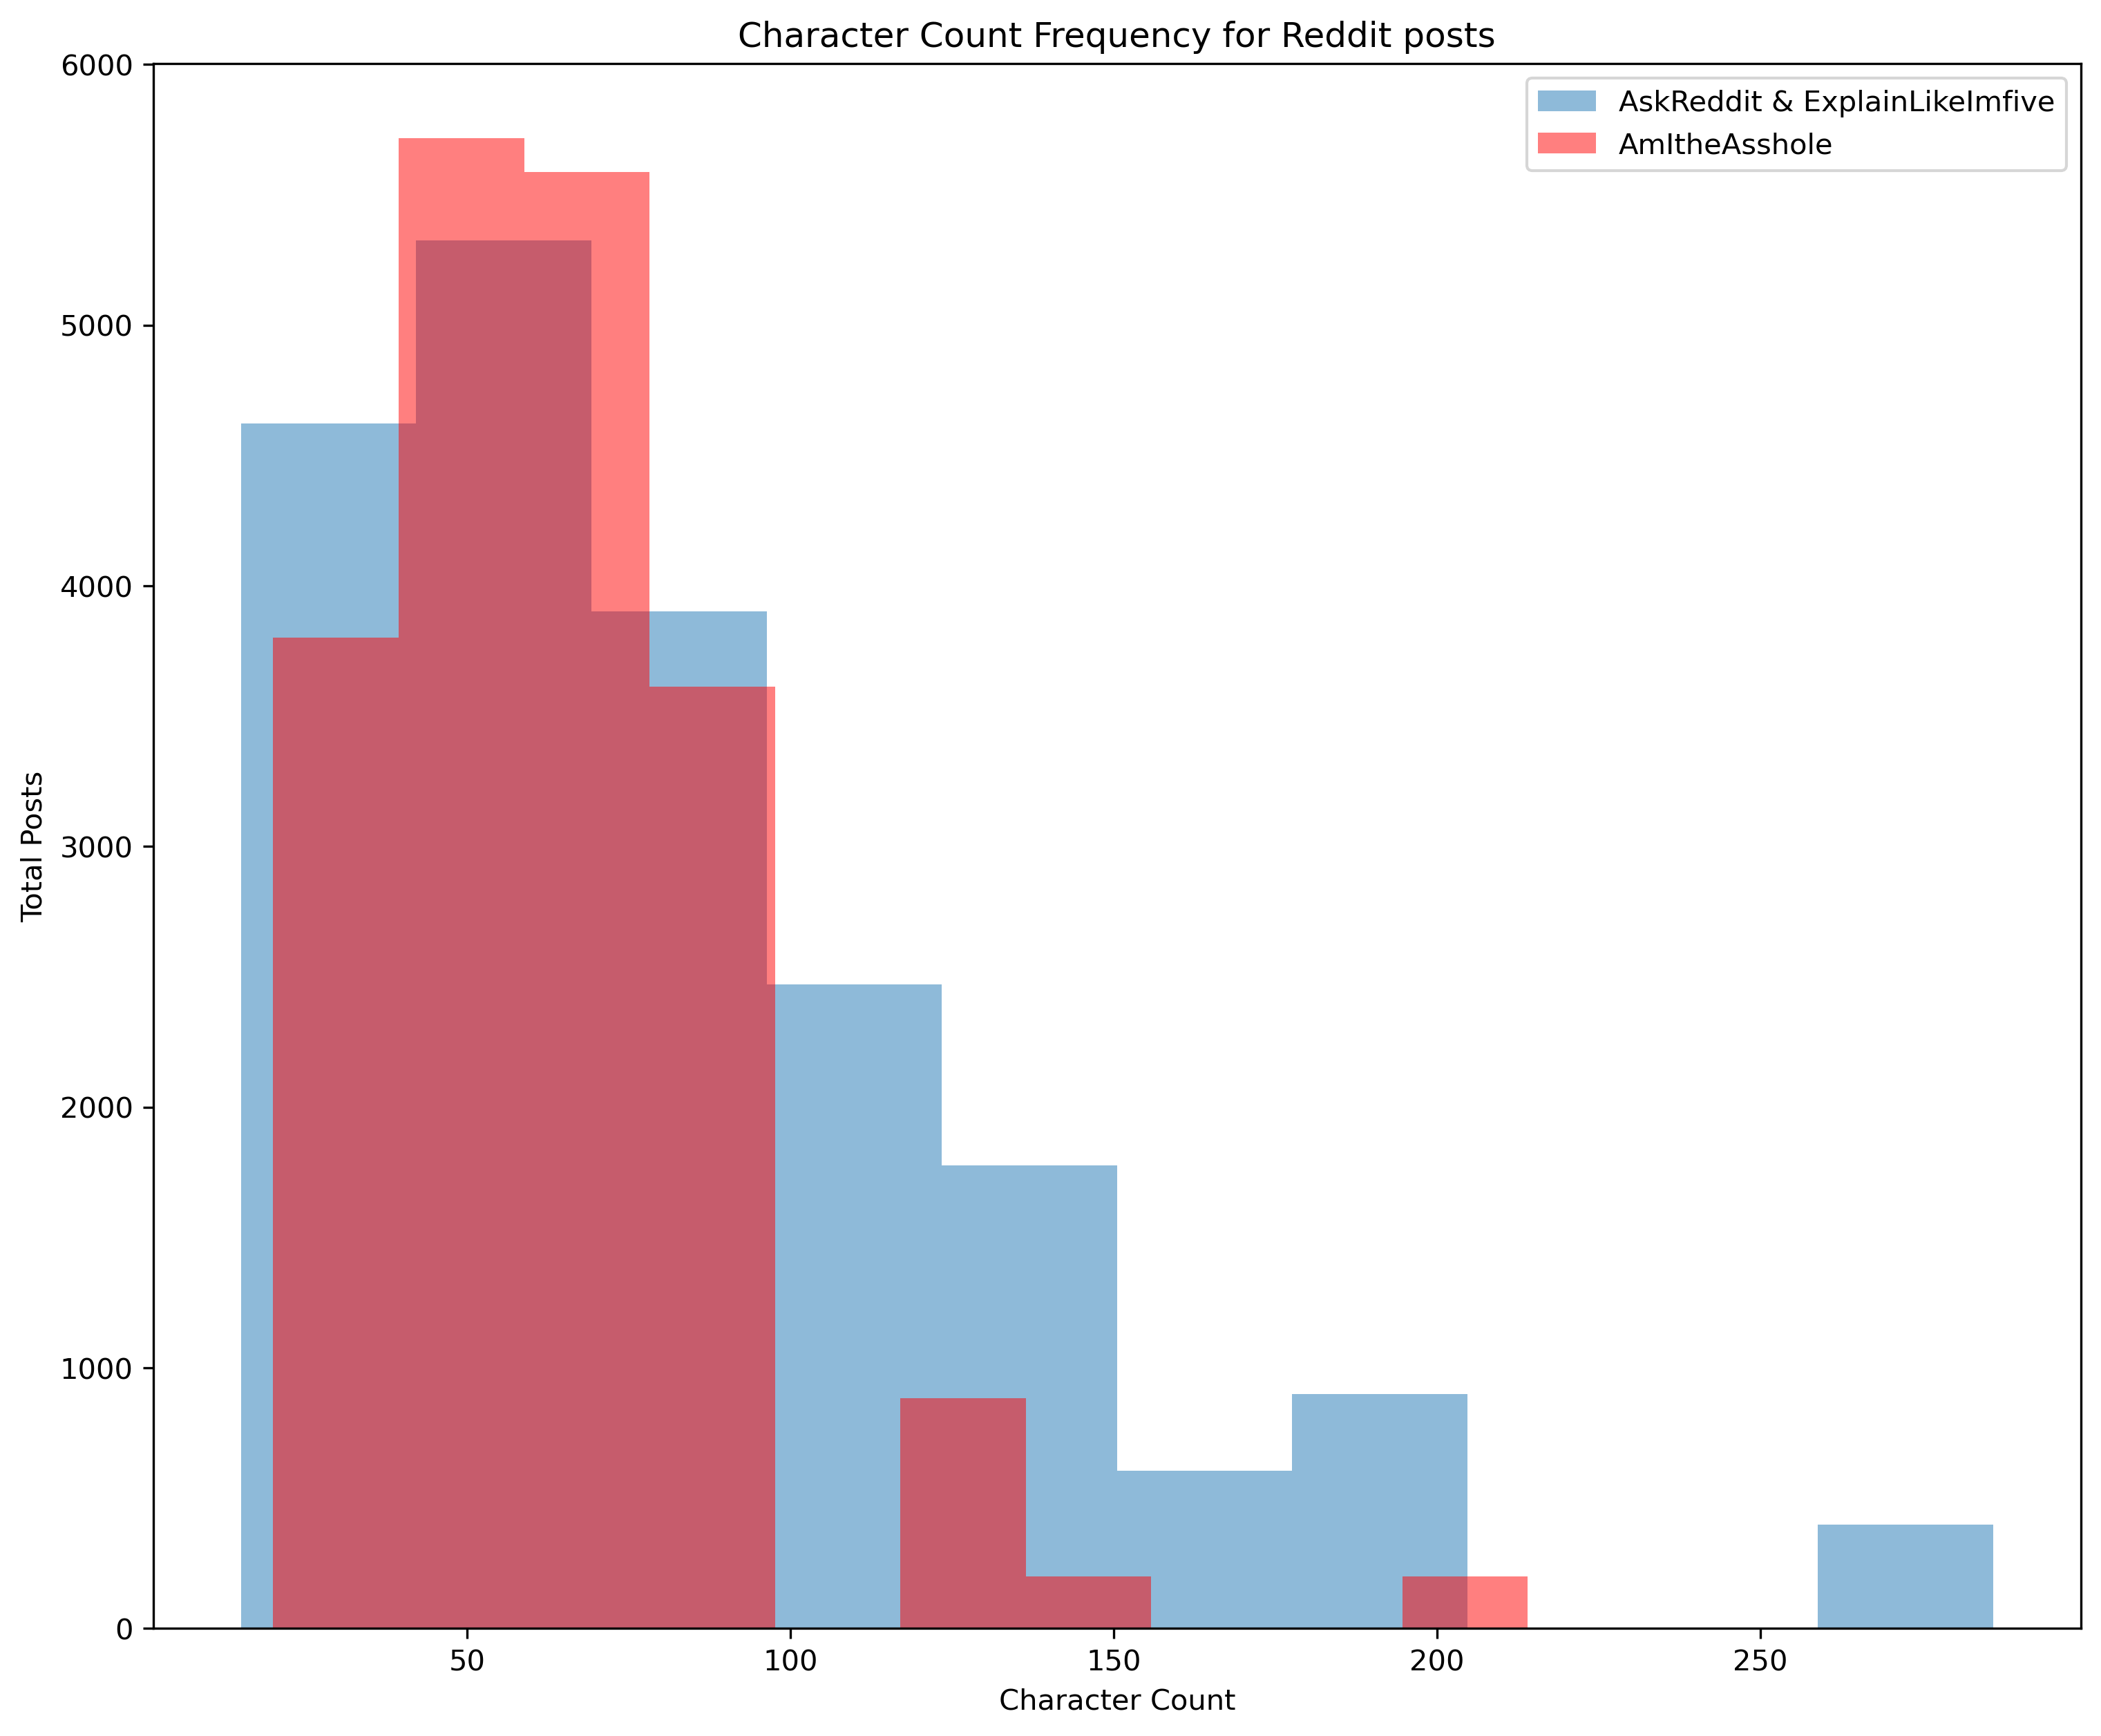

In [99]:
plt.figure(figsize = [12, 10], dpi = 300)
plt.hist(better_word_df['char_count'], alpha = .5, label = 'AskReddit & ExplainLikeImfive')
plt.hist(bad_word_df['char_count'], alpha = .5, label = 'AmItheAsshole', color = 'r');
plt.legend(loc = 'upper right')
plt.title('Character Count Frequency for Reddit posts');
plt.ylabel('Total Posts');
plt.xlabel('Character Count');

Text(0.5, 0, 'Sentiment Score')

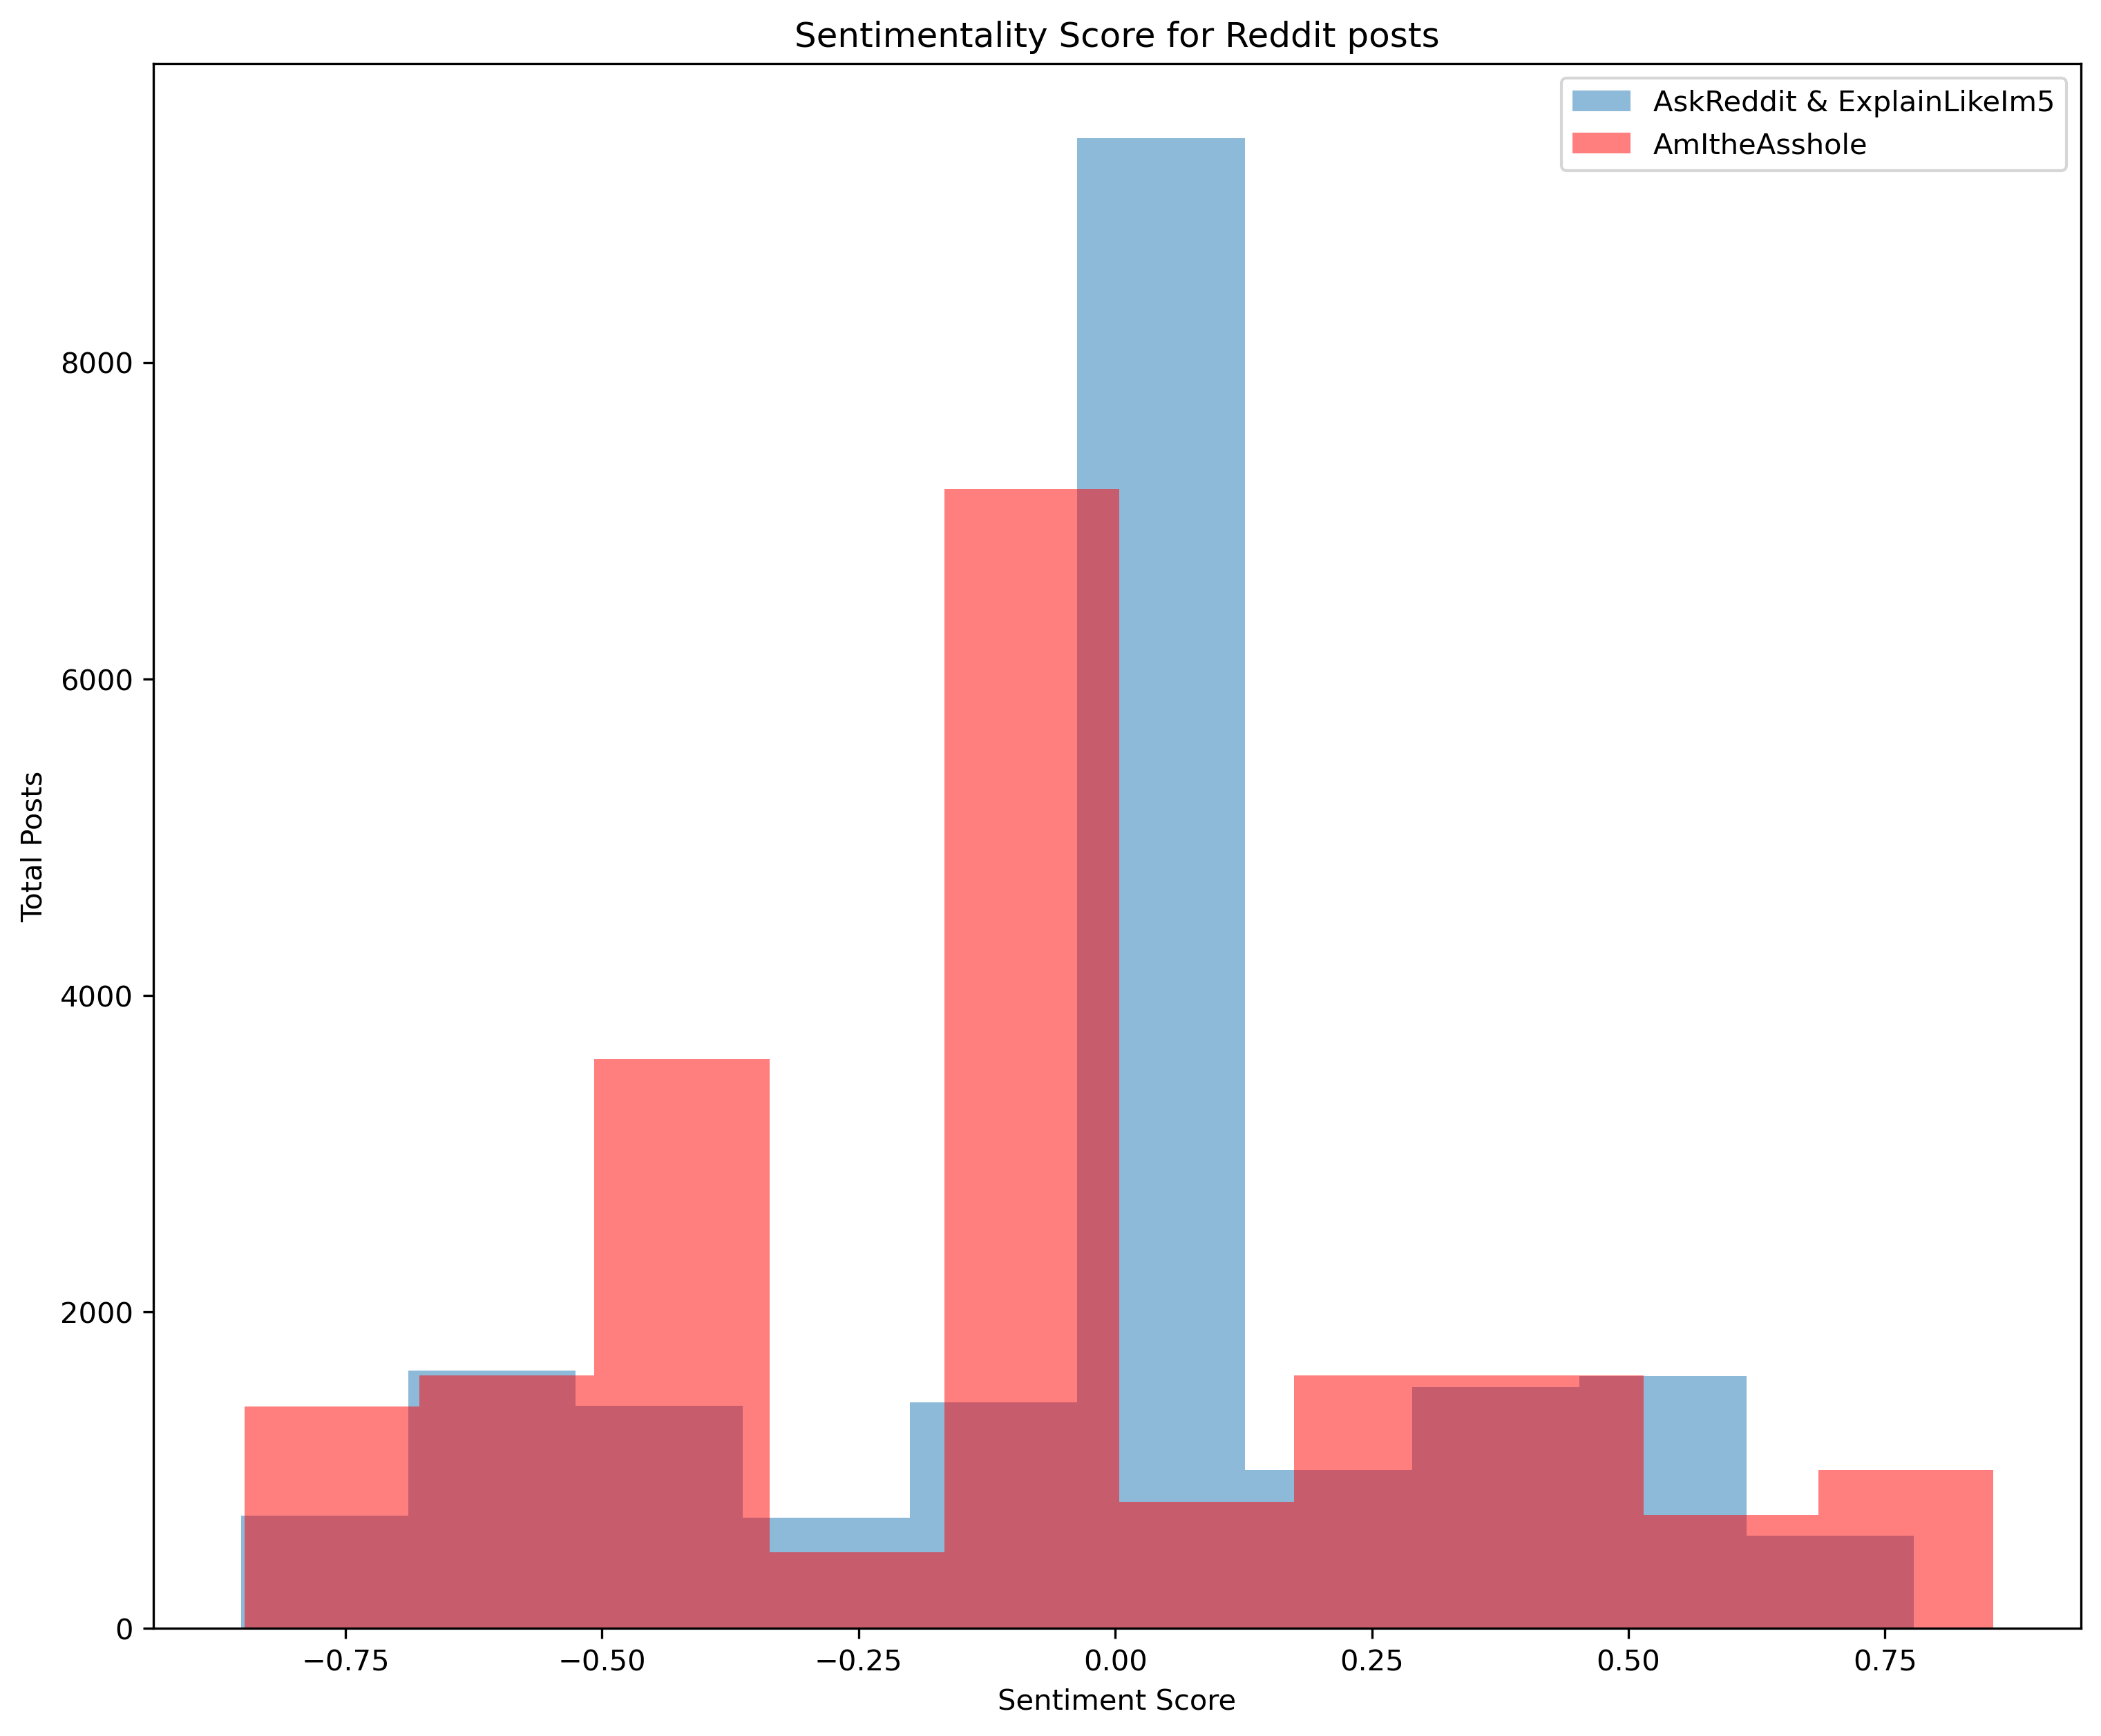

In [100]:
plt.figure(figsize = [12, 10], dpi = 300)
plt.hist(better_word_df['sentiment'], alpha = .5, label = 'AskReddit & ExplainLikeIm5')
plt.hist(bad_word_df['sentiment'], alpha = .5, label = 'AmItheAsshole', color = 'r');
plt.legend(loc = 'upper right')
plt.title('Sentimentality Score for Reddit posts');
plt.ylabel('Total Posts');
plt.xlabel('Sentiment Score');

### Creating datasets of the most important/frequent words

In [89]:
top_10_counted_words = fullset_feature_importance_df.sort_values(by = 'word_counts', axis = 0, ascending = False).head(10)
top_10_importance_words = fullset_feature_importance_df.sort_values(by = 'importance', axis = 0, ascending = False).head(10)

In [90]:
top_10_importance_words

,importance,word,word_counts
930,4.587068,wanting,2200.0
549,4.289530,mom,1800.0
355,3.994833,girlfriend,1388.0
558,3.325621,moving,200.0
52,3.077328,arsehole,200.0
105,3.065627,boyfriend,1200.0
561,2.966193,mum,400.0
306,2.961430,father,1000.0
852,2.945551,telling,1200.0
110,2.871788,broke,1100.0


In [69]:
top_10_counted_words

,importance,word,word_counts
339,1.310118,friend,2994.0
253,-3.600541,doe,2213.0
930,4.587068,wanting,2200.0
549,4.289530,mom,1800.0
947,-3.536771,whats,1661.0
928,-0.394902,want,1588.0
923,-1.739476,wa,1509.0
618,-3.202969,people,1492.0
355,3.994833,girlfriend,1388.0
258,0.742538,dont,1388.0


#### Looking at word count vs importance

In [2]:
plt.figure(figsize = [12, 10], dpi = 300)
plt.bar(top_10_counted_words['word'], top_10_counted_words['word_counts'])
plt.title('Top words used in Reddit posts');
plt.ylabel('Times used');
plt.xlabel('Word');

NameError: name 'plt' is not defined

In [3]:
plt.figure(figsize = [12, 10], dpi = 300)
plt.bar(top_10_counted_words['word'], top_10_counted_words['importance'], color = 'purple')
plt.title('Top words used in Reddit posts');
plt.ylabel('Importance');
plt.xlabel('Word');

NameError: name 'plt' is not defined

#### Visualizing the most relevant words

Text(0.5, 0, 'Word')

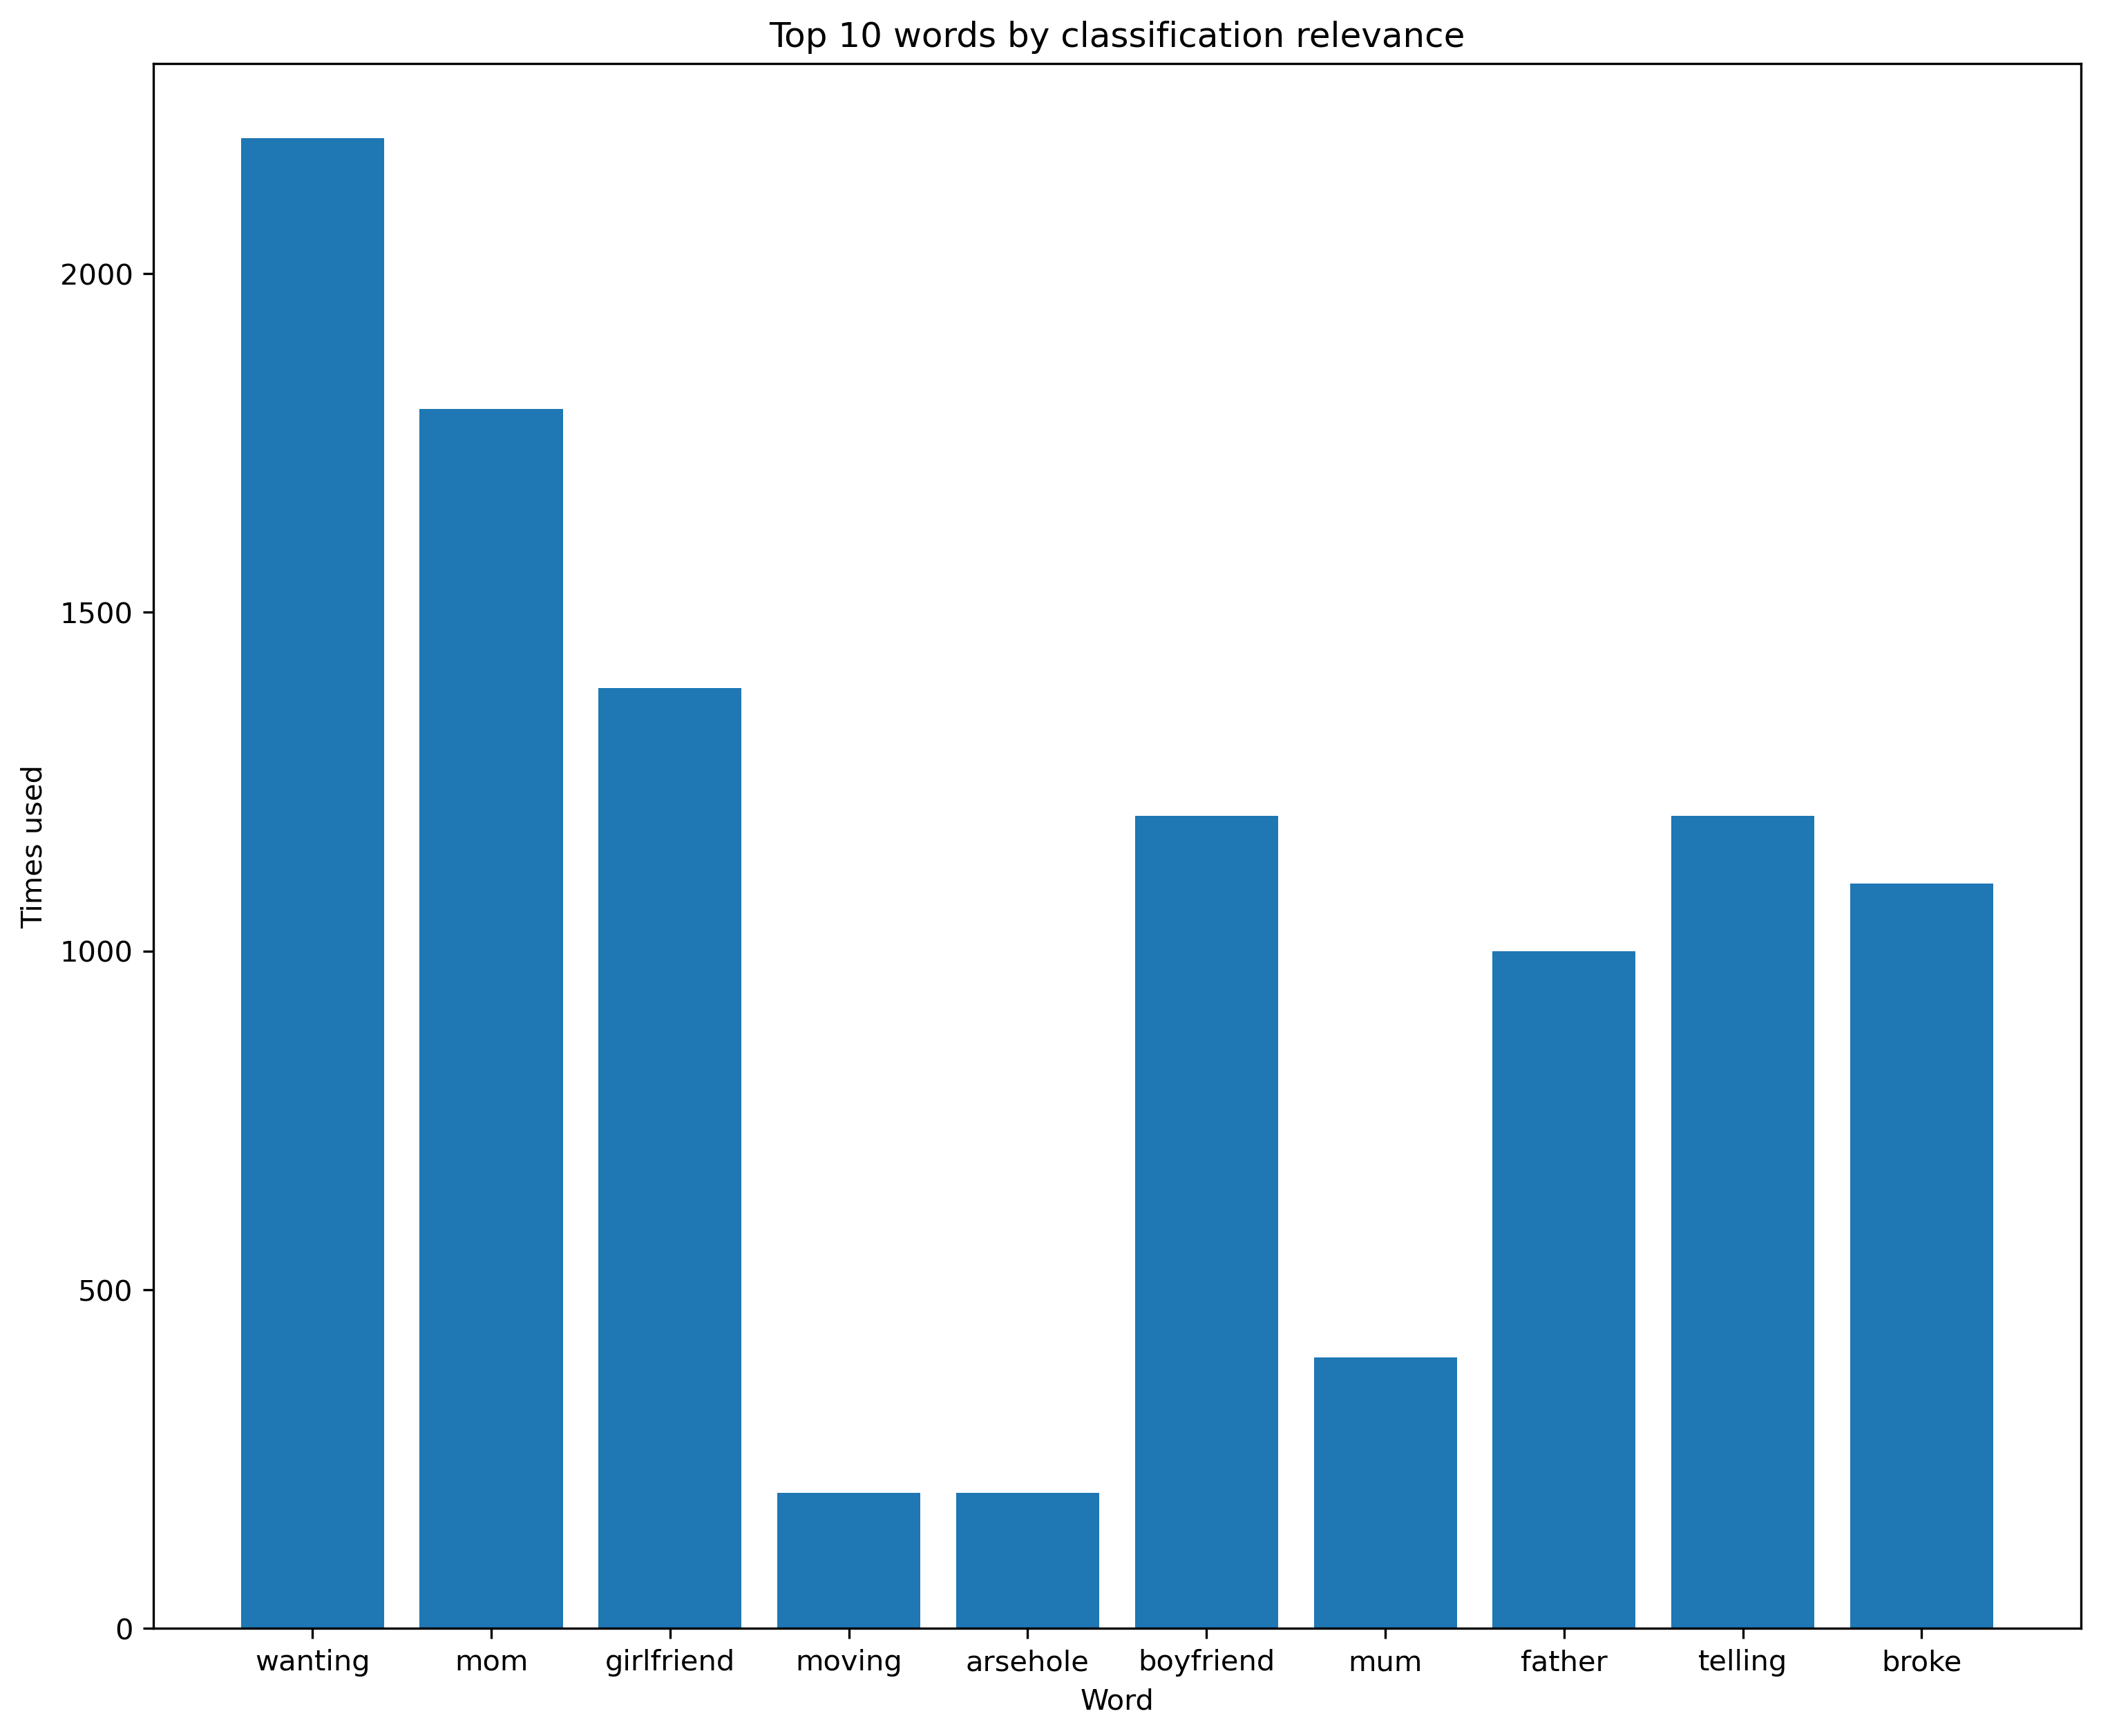

In [106]:
plt.figure(figsize = [12, 10], dpi = 300)
plt.bar(top_10_importance_words['word'], top_10_importance_words['word_counts'])
plt.title('Top 10 words by classification relevance');
plt.ylabel('Times used');
plt.xlabel('Word');

Text(0.5, 0, 'Word')

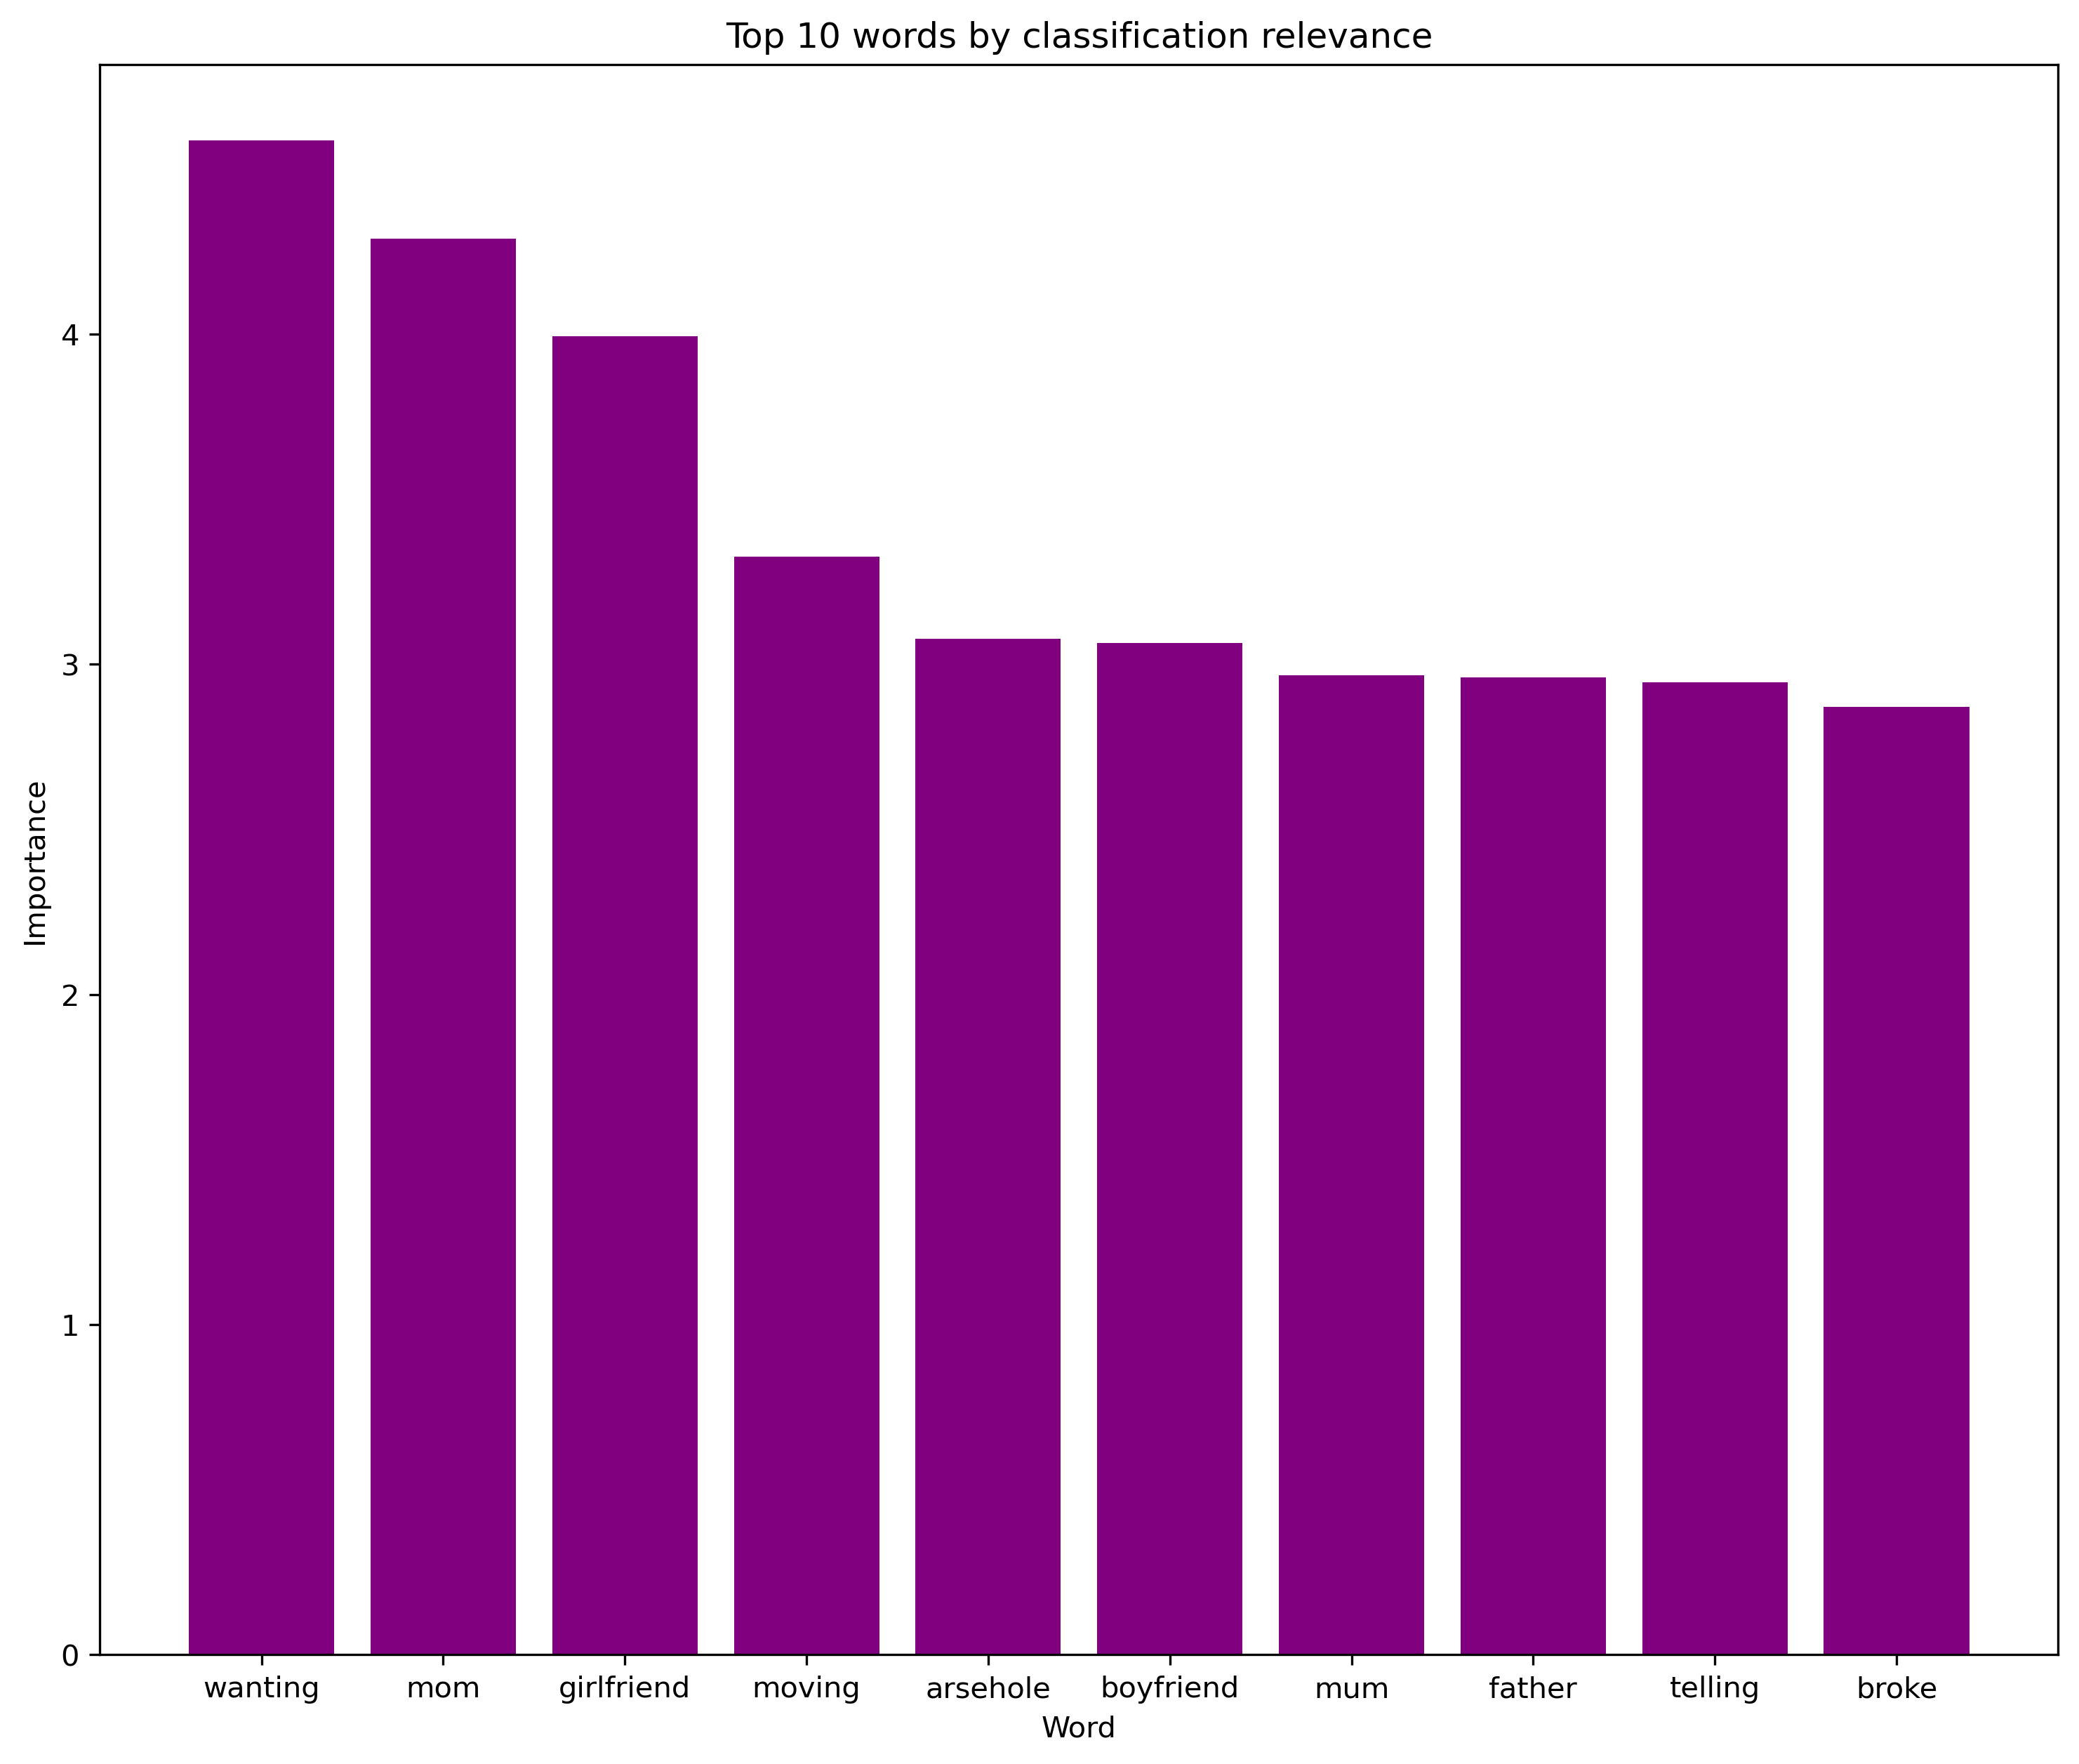

In [107]:
plt.figure(figsize = [12, 10], dpi = 300)
plt.bar(top_10_importance_words['word'], top_10_importance_words['importance'], color = 'purple')
plt.title('Top 10 words by classification relevance');
plt.ylabel('Importance');
plt.xlabel('Word');